<a href="https://colab.research.google.com/github/chinmyeepawar-pixel/personality-mirror-app/blob/main/image_negative_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


In [3]:
image_path = '/content/images elephant.jpg'
original_image = Image.open(image_path)

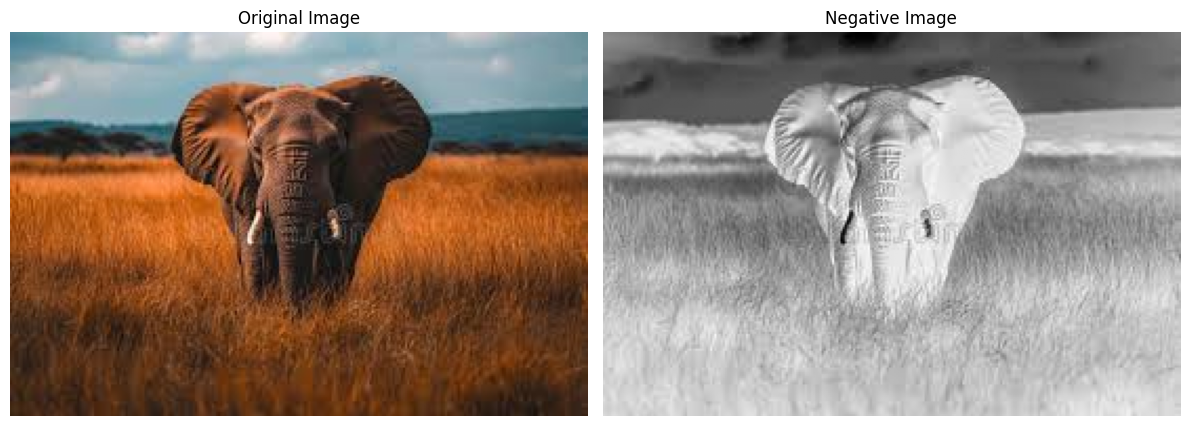

In [6]:
if original_image.mode != 'L':
    gray_image = original_image.convert('L')
else:
    gray_image = original_image.copy()

image_array = np.array(gray_image)

negative_image_array = 255 - image_array


negative_image = Image.fromarray(negative_image_array.astype(np.uint8))


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(negative_image, cmap='gray')
plt.title('Negative Image')
plt.axis('off')
plt.tight_layout()
plt.show()

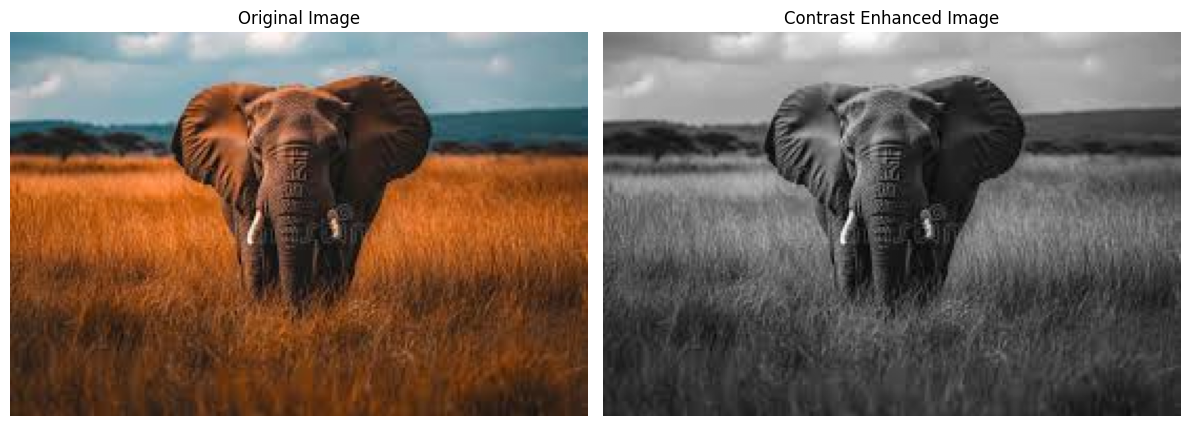

In [9]:
if original_image.mode != 'L':
    gray_image = original_image.convert('L')
else:
    gray_image = original_image.copy()

image_array = np.array(gray_image)


min_val = np.min(image_array)
max_val = np.max(image_array)


if max_val - min_val == 0:
    contrast_image_array = np.zeros_like(image_array)
else:
    contrast_image_array = ((image_array - min_val) * (255.0 / (max_val - min_val))).astype(np.uint8)


contrast_image = Image.fromarray(contrast_image_array)


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(contrast_image, cmap='gray')
plt.title('Contrast Enhanced Image')
plt.axis('off')

plt.tight_layout()
plt.show()

In [12]:
def extract_bit_plane(image_array, bit_position):
    """
    Extracts a specific bit plane from an 8-bit grayscale image array.

    Args:
        image_array (numpy.ndarray): The 8-bit grayscale image array.
        bit_position (int): The position of the bit to extract (0-7, where 0 is LSB).

    Returns:
        numpy.ndarray: The extracted bit plane, scaled to 0 or 255.
    """
    # Right shift to move the desired bit to the 0th position
    shifted_image = image_array >> bit_position

    # Use bitwise AND with 1 to isolate just that bit
    isolated_bit = shifted_image & 1

    # Scale the bit values (0 or 1) to full intensity (0 or 255) for visualization
    bit_plane = isolated_bit * 255

    return bit_plane.astype(np.uint8)

print("Function 'extract_bit_plane' defined.")

Function 'extract_bit_plane' defined.


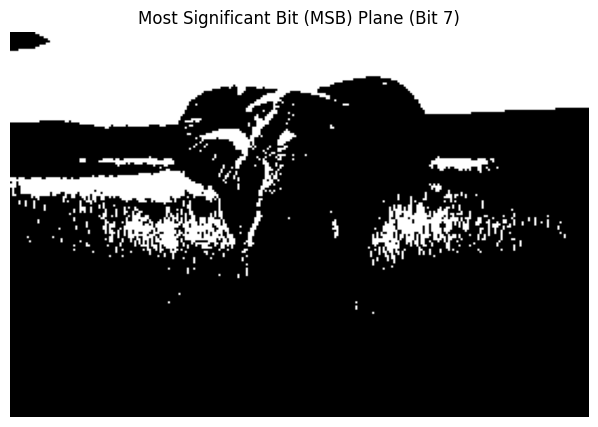

In [13]:
msb_plane = extract_bit_plane(image_array, 7)

plt.figure(figsize=(10, 5))
plt.imshow(msb_plane, cmap='gray')
plt.title('Most Significant Bit (MSB) Plane (Bit 7)')
plt.axis('off')
plt.show()


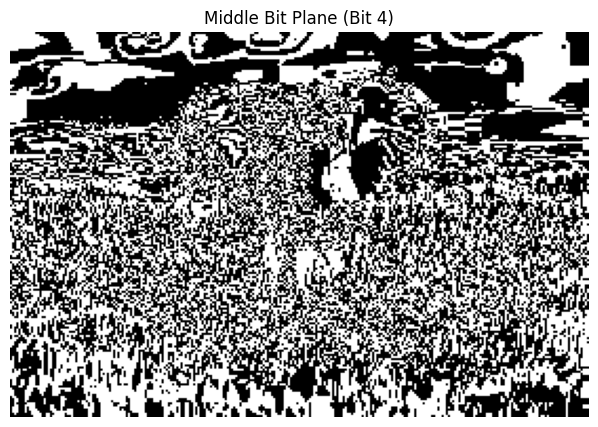

In [14]:
middle_bit_plane = extract_bit_plane(image_array, 4)

plt.figure(figsize=(10, 5))
plt.imshow(middle_bit_plane, cmap='gray')
plt.title('Middle Bit Plane (Bit 4)')
plt.axis('off')
plt.show()

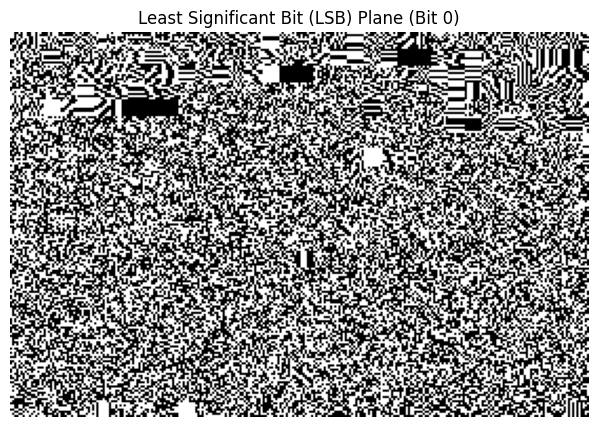

In [15]:
lsb_plane = extract_bit_plane(image_array, 0)

plt.figure(figsize=(10, 5))
plt.imshow(lsb_plane, cmap='gray')
plt.title('Least Significant Bit (LSB) Plane (Bit 0)')
plt.axis('off')
plt.show()